In [20]:
from fredapi import Fred
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

2.1 Obtain Time Series Data

In [21]:
# set API
fredapi_key = 'ffc904c94843ef0e4de0be45e4e498de'
fred = Fred(api_key=fredapi_key)

In [22]:
# get data from API
crypto_data = fred.get_series('CBBTCUSD') #Coinbase Bitcoin
crypto_data.name = "Bitcoin"

safe_stock_data = fred.get_series('ID7108') #Gold
safe_stock_data.name = "Gold"

overall_stock_data = fred.get_series('SP500') #S&P500
overall_stock_data.name = "S&P500"

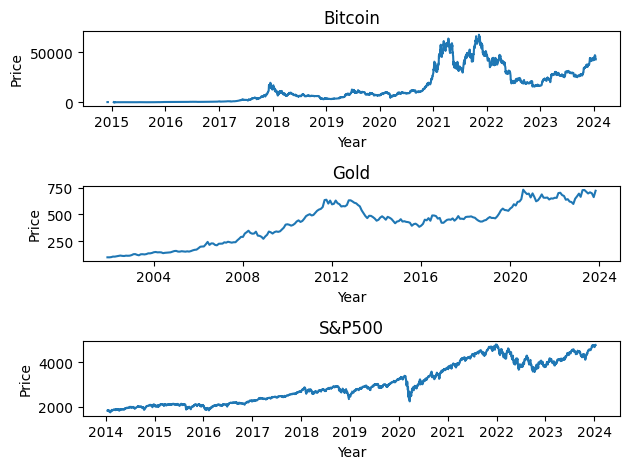

In [23]:
fig, axs = plt.subplots(3)

axs[0].plot(crypto_data)
axs[0].set_title(crypto_data.name)
axs[1].plot(safe_stock_data)
axs[1].set_title(safe_stock_data.name)
axs[2].plot(overall_stock_data)
axs[2].set_title(overall_stock_data.name)

for ax in axs.flat:
	ax.set(xlabel = 'Year', ylabel = 'Price')

fig.tight_layout()
plt.show()

2.2 Data Transformations

In [26]:
# merge 3 data series into a DataFrame
df = pd.merge(crypto_data, safe_stock_data, left_index=True, right_index=True)
df = pd.merge(df, overall_stock_data, left_index=True, right_index=True)
df = df.fillna(method = 'ffill')

In [27]:
# transform observations into returns
df_returns = np.log(df/df.shift(1))
df_returns = df_returns.dropna()
print(df_returns)

             Bitcoin      Gold    S&P500
2015-01-01  0.000000  0.009635  0.000000
2015-04-01 -0.400599 -0.002972  0.003039
2015-05-01 -0.061265 -0.013603  0.023322
2015-06-01 -0.041959 -0.005353  0.001630
2015-07-01  0.147225 -0.013155 -0.016381
...              ...       ...       ...
2023-05-01  0.171512  0.092254  0.053338
2023-06-01 -0.044433 -0.023331  0.012672
2023-08-01  0.102334 -0.007333  0.080908
2023-09-01 -0.141666 -0.012677 -0.013409
2023-11-01  0.318218  0.033132 -0.063517

[77 rows x 3 columns]


2.3 Data Analysis

In [25]:
rb_rf = df_returns["Bitcoin"] - df_returns["Gold"]
rm_rf = df_returns["S&P500"] - df_returns["Gold"]

model = sm.OLS(rb_rf, sm.add_constant(rm_rf))
result = model.fit()
print(result.summary())

alpha = result.params.iloc[0]
beta = result.params.iloc[1]
print(f'\n\nAlpha: {alpha}')
print(f'Beta: {beta}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     5.136
Date:                Sun, 14 Jan 2024   Prob (F-statistic):             0.0263
Time:                        16:45:46   Log-Likelihood:                -1.1819
No. Observations:                  77   AIC:                             6.364
Df Residuals:                      75   BIC:                             11.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0499      0.028      1.757      0.0

Interpretation:

Alpha: The intercept is 0.0499. If it were statistically significant, it is the excess return when the independent variable are zero. In this case, it's not statistically significant at the 0.05 level.

Beta: The coefficient for the variable is 0.9862. This is the sensitivity of the dependent variable to changes in the independent variable, which represents the estimated effect of the variable on the dependent variable.

Overall Model Significance: The F-statistic is 5.136, with a p-value of 0.0263. This suggests that the model, as a whole, is statistically significant at the 0.05 level.

R-squared: The R-squared of 0.064 indicates that approximately 6.4% of the variability in the dependent variable is explained by the independent variable in the model.